In [13]:
import pickle

In [14]:
with open("tag_domain_edgelist.pkl", "rb") as fp:
    edgelist = pickle.load(fp)

In [16]:
import networkx as nx
from networkx.algorithms import bipartite

#DomainDomain_ProjectionGraph

In [17]:
BipartiteGraph = nx.Graph()
BipartiteGraph.add_weighted_edges_from(edgelist)

In [57]:
edgelist[:10]

[('visa', 'academia', 79),
 ('job-search', 'academia', 937),
 ('journals', 'academia', 1490),
 ('journals', 'or', 2),
 ('journals', 'matheducators', 2),
 ('journals', 'stats', 18),
 ('engineering', 'electronics', 46),
 ('engineering', 'academia', 241),
 ('copyright', 'buddhism', 3),
 ('copyright', 'gamedev', 155)]

In [56]:
nx.is_bipartite(BipartiteGraph)

False

In [47]:
BipartiteGraph.edges(data=True)

EdgeDataView([('visa', 'academia', {'weight': 79}), ('academia', 'job-search', {'weight': 937}), ('academia', 'journals', {'weight': 1490}), ('academia', 'engineering', {'weight': 241}), ('academia', 'copyright', {'weight': 406}), ('academia', 'arxiv', {'weight': 335}), ('academia', 'bibliometrics', {'weight': 149}), ('academia', 'graduate-school', {'weight': 1742}), ('academia', 'germany', {'weight': 262}), ('academia', 'books', {'weight': 295}), ('academia', 'career-path', {'weight': 1050}), ('academia', 'job', {'weight': 491}), ('academia', 'reference-request', {'weight': 272}), ('academia', 'grades', {'weight': 260}), ('academia', 'software', {'weight': 206}), ('academia', 'citations', {'weight': 1695}), ('academia', 'language', {'weight': 174}), ('academia', 'student-exchange', {'weight': 33}), ('academia', 'seminars', {'weight': 72}), ('academia', 'community', {'weight': 33}), ('academia', 'science', {'weight': 140}), ('academia', 'open-access', {'weight': 193}), ('academia', 'te

# Creating adjacency list of the bipartite graph 
(This Adjacency List a list of tuples, were first element of the tuple is a node, say n1, and 2nd element of the tuple is a dictionary which maps all the nodes that n1 is connected to, to the weights with which they are connected)

In [48]:
BipartiteGraph_AdjList = [(n, nbrdict) for n, nbrdict in BipartiteGraph.adjacency()]

In [49]:
BipartiteGraph_AdjList[:10]

[('visa', {'academia': {'weight': 79}}),
 ('academia',
  {'visa': {'weight': 79},
   'job-search': {'weight': 937},
   'journals': {'weight': 1490},
   'engineering': {'weight': 241},
   'copyright': {'weight': 406},
   'arxiv': {'weight': 335},
   'bibliometrics': {'weight': 149},
   'graduate-school': {'weight': 1742},
   'germany': {'weight': 262},
   'books': {'weight': 295},
   'career-path': {'weight': 1050},
   'job': {'weight': 491},
   'reference-request': {'weight': 272},
   'grades': {'weight': 260},
   'software': {'weight': 206},
   'citations': {'weight': 1695},
   'language': {'weight': 174},
   'student-exchange': {'weight': 33},
   'seminars': {'weight': 72},
   'community': {'weight': 33},
   'science': {'weight': 140},
   'open-access': {'weight': 193},
   'teaching': {'weight': 1040},
   'literature': {'weight': 68},
   'reading': {'weight': 85},
   'publishers': {'weight': 243},
   'coursework': {'weight': 248},
   'teaching-assistant': {'weight': 210},
   'postdoc

In [20]:
BipartiteGraph_AdjList[0]

('visa', {'academia': {'weight': 79}})

In [21]:
BipartiteGraph_AdjList[1]

('academia',
 {'visa': {'weight': 79},
  'job-search': {'weight': 937},
  'journals': {'weight': 1490},
  'engineering': {'weight': 241},
  'copyright': {'weight': 406},
  'arxiv': {'weight': 335},
  'bibliometrics': {'weight': 149},
  'graduate-school': {'weight': 1742},
  'germany': {'weight': 262},
  'books': {'weight': 295},
  'career-path': {'weight': 1050},
  'job': {'weight': 491},
  'reference-request': {'weight': 272},
  'grades': {'weight': 260},
  'software': {'weight': 206},
  'citations': {'weight': 1695},
  'language': {'weight': 174},
  'student-exchange': {'weight': 33},
  'seminars': {'weight': 72},
  'community': {'weight': 33},
  'science': {'weight': 140},
  'open-access': {'weight': 193},
  'teaching': {'weight': 1040},
  'literature': {'weight': 68},
  'reading': {'weight': 85},
  'publishers': {'weight': 243},
  'coursework': {'weight': 248},
  'teaching-assistant': {'weight': 210},
  'postdocs': {'weight': 1032},
  'workflow': {'weight': 32},
  'note-taking': {'

In [10]:
len(BipartiteGraph_AdjList)

11145

# Creating Hashmap and Inverse Hashmap

In [22]:
hashed_edgelist = []
hashmap = {}
inverse_hashmap = {}
i = 0
for edgetuple in edgelist:
    if edgetuple[0] not in hashmap:
        hashmap[edgetuple[0]] = i
        inverse_hashmap[i] = edgetuple[0]
        i+=1
    if edgetuple[1] not in hashmap:
        hashmap[edgetuple[1]] = i
        inverse_hashmap[i] = edgetuple[1]
        i+=1
        
#print(hashmap)

In [12]:
hashmap[edgelist[0][0]]  ## edgelist[0][0] = 29108

0

In [16]:
hashmap[edgelist[0][1]]  ## edgelist[0][1] = "academia"

1

In [17]:
hashmap['academia']

1

In [18]:
hashmap[edgelist[1][0]]  ## edgelist[1][0] = 318519

2

In [29]:
hashmap[edgelist[1][1]]  ## edgelist[0][2] = "academia"

1

In [19]:
BipartiteGraph_AdjList[hashmap[edgelist[0][1]]][1].keys() ## All the users edgelist[0][1] i.e 'academia' is connected to

dict_keys(['visa', 'job-search', 'journals', 'engineering', 'copyright', 'arxiv', 'bibliometrics', 'graduate-school', 'germany', 'books', 'career-path', 'job', 'reference-request', 'grades', 'software', 'citations', 'language', 'student-exchange', 'seminars', 'community', 'science', 'open-access', 'teaching', 'literature', 'reading', 'publishers', 'coursework', 'teaching-assistant', 'postdocs', 'workflow', 'note-taking', 'preprint', 'reputation', 'collaboration', 'tools', 'application', 'phd', 'chemistry', 'time-management', 'authorship', 'correspondence', 'personal-name', 'conference', 'advisor', 'mentoring', 'research-process', 'europe', 'online-resource', 'funding', 'salary', 'networking', 'undergraduate', 'recommendation-letter', 'professors', 'graduate-admissions', 'lab-meeting', 'cv', 'education', 'presentation', 'writing', 'email', 'etiquette', 'industry', 'interview', 'research-misconduct', 'international', 'working-time', 'masters', 'peer-review', 'travel', 'research-undergrad

In [20]:
type(list(BipartiteGraph_AdjList[hashmap['buddhism']][1].keys())[1])

str

# Building the domain-domain projection network w.r.t Tags

In [23]:
DomainsList = []
for eachtuple in edgelist :
    if eachtuple[1] not in DomainsList:
        DomainsList.append(eachtuple[1])

In [24]:
DomainsList

['academia',
 'or',
 'matheducators',
 'stats',
 'electronics',
 'buddhism',
 'gamedev',
 'economics',
 'chinese',
 'chemistry',
 'robotics',
 'cs',
 'islam',
 'music',
 'quant',
 'datascience',
 'hermeneutics',
 'hinduism',
 'scicomp',
 'linguistics',
 'physics',
 'russian',
 'french',
 'cseducators',
 'tor',
 'spanish']

In [25]:
ProjectionNetwork = nx.Graph()

In [26]:
ProjectionNetwork.add_nodes_from(DomainsList)

In [27]:
#BipartiteGraph.add_weighted_edges_from(edgelist) edgelist is a list of edgetuples
for i in range(len(DomainsList)-1):
    print(DomainsList[i])
    for j in range(i+1,len(DomainsList)):
        #print(DomainsList[j])
        Domain1 = DomainsList[i]
        Domain2 = DomainsList[j]
        hashedDomain1 = hashmap[Domain1]
        #print(hashedDomain1)
        hashedDomain2 = hashmap[Domain2]
        #print(hashedDomain2)
        #We want to calculate the edgeweight between Domain1 and Domain2 in the projection Network
        
        
        #Find the list of common neighbours between Domain1 and Domain2
        Dict1_of_Neighbours = BipartiteGraph_AdjList[hashedDomain1][1]
        Dict2_of_Neighbours = BipartiteGraph_AdjList[hashedDomain2][1]
        List1 = list(Dict1_of_Neighbours.keys())
        List2 = list(Dict2_of_Neighbours.keys())
        List_of_Common_Neighbours = list(set(List1) & set(List2))
        
        #Each common user contributes something to the total edgeweight between Domain1 and Domain2
        #We find how important each commonuser is to domain1 and to domain2 and multiply the normalised importance
        #to get the contribution to total edgeweight between Domain1 and Domain2 by each commonuser.
        edgeweight = 0
        for commonUser in List_of_Common_Neighbours:
            importance1 = BipartiteGraph_AdjList[hashedDomain1][1][commonUser]['weight']
            importance2 = BipartiteGraph_AdjList[hashedDomain2][1][commonUser]['weight']
            
            sum1 = 0
            for users in List1:
                sum1 += BipartiteGraph_AdjList[hashedDomain1][1][users]['weight']
            sum2 = 0
            for users in List2:
                sum2 += BipartiteGraph_AdjList[hashedDomain2][1][users]['weight']
                
            normalised_importance1 = importance1/sum1
            normalised_importance2 = importance2/sum2
            
            edgeweight += normalised_importance1*normalised_importance1
            
        if edgeweight !=0:
            ProjectionNetwork.add_edge(Domain1, Domain2, weight=edgeweight)

academia
or
matheducators
stats
electronics
buddhism
gamedev
economics
chinese
chemistry
robotics
cs
islam
music
quant
datascience
hermeneutics
hinduism
scicomp
linguistics
physics
russian
french
cseducators
tor


In [50]:
ProjectionNetwork.nodes()

NodeView(('academia', 'or', 'matheducators', 'stats', 'electronics', 'buddhism', 'gamedev', 'economics', 'chinese', 'chemistry', 'robotics', 'cs', 'islam', 'music', 'quant', 'datascience', 'hermeneutics', 'hinduism', 'scicomp', 'linguistics', 'physics', 'russian', 'french', 'cseducators', 'tor', 'spanish'))

Done in few seconds

In [28]:
edges = ProjectionNetwork.edges()
pos = nx.spring_layout(ProjectionNetwork)

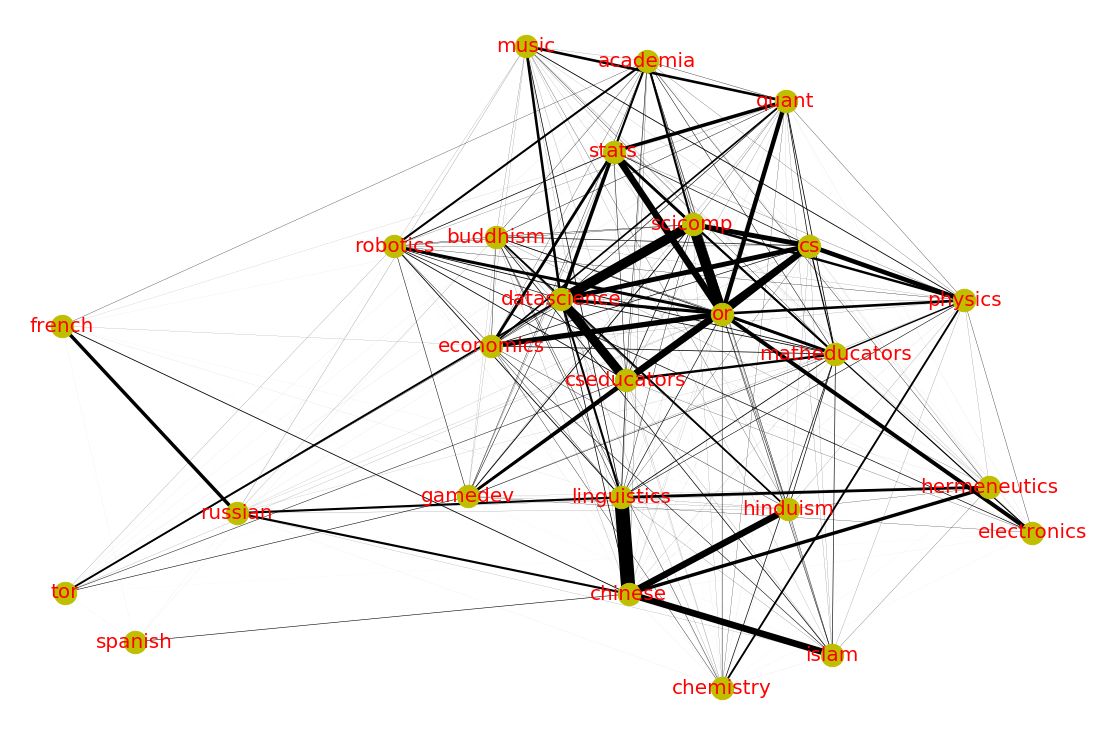

In [29]:
import matplotlib.pyplot as plt

weights = [ProjectionNetwork[u][v]['weight']*500 for u,v in edges]

plt.figure(figsize=(15,10))
nx.draw(ProjectionNetwork, edges=edges, width=weights, with_labels = True, node_size = 500, node_color = 'y', font_color = 'r', font_size = 20)
plt.savefig('DomainDomainProjection_TAGS.png')
plt.show()

# Running LOUVAIN Community Detection Algorithm

In [30]:
import community
import networkx as nx
import matplotlib.pyplot as plt

In [33]:
from community import community_louvain
partition = community_louvain.best_partition(ProjectionNetwork, resolution = 1)

In [34]:
partition

{'academia': 0,
 'or': 0,
 'matheducators': 0,
 'stats': 0,
 'electronics': 0,
 'buddhism': 1,
 'gamedev': 2,
 'economics': 0,
 'chinese': 1,
 'chemistry': 2,
 'robotics': 0,
 'cs': 2,
 'islam': 1,
 'music': 2,
 'quant': 0,
 'datascience': 2,
 'hermeneutics': 1,
 'hinduism': 1,
 'scicomp': 2,
 'linguistics': 1,
 'physics': 2,
 'russian': 1,
 'french': 1,
 'cseducators': 2,
 'tor': 2,
 'spanish': 1}

# Partition on Projection created using Jaccard Coefficient

In [35]:
from networkx.algorithms import bipartite

In [37]:
BipartiteGraphNodes = []
for edgetuple in edgelist:
    if edgetuple[1] not in BipartiteGraphNodes:
        BipartiteGraphNodes.append(edgetuple[1])

In [41]:
BipartiteGraphNodes

['academia',
 'or',
 'matheducators',
 'stats',
 'electronics',
 'buddhism',
 'gamedev',
 'economics',
 'chinese',
 'chemistry',
 'robotics',
 'cs',
 'islam',
 'music',
 'quant',
 'datascience',
 'hermeneutics',
 'hinduism',
 'scicomp',
 'linguistics',
 'physics',
 'russian',
 'french',
 'cseducators',
 'tor',
 'spanish']

In [52]:
BipartiteGraph.edges()

EdgeView([('visa', 'academia'), ('academia', 'job-search'), ('academia', 'journals'), ('academia', 'engineering'), ('academia', 'copyright'), ('academia', 'arxiv'), ('academia', 'bibliometrics'), ('academia', 'graduate-school'), ('academia', 'germany'), ('academia', 'books'), ('academia', 'career-path'), ('academia', 'job'), ('academia', 'reference-request'), ('academia', 'grades'), ('academia', 'software'), ('academia', 'citations'), ('academia', 'language'), ('academia', 'student-exchange'), ('academia', 'seminars'), ('academia', 'community'), ('academia', 'science'), ('academia', 'open-access'), ('academia', 'teaching'), ('academia', 'literature'), ('academia', 'reading'), ('academia', 'publishers'), ('academia', 'coursework'), ('academia', 'teaching-assistant'), ('academia', 'postdocs'), ('academia', 'workflow'), ('academia', 'note-taking'), ('academia', 'preprint'), ('academia', 'reputation'), ('academia', 'collaboration'), ('academia', 'tools'), ('academia', 'application'), ('aca

In [55]:
nx.is_bipartite(BipartiteGraph)

False

In [53]:
Jaccardbased_Projection = bipartite.overlap_weighted_projected_graph(BipartiteGraph, BipartiteGraphNodes)

In [54]:
Jaccardbased_Projection.nodes()

NodeView(('academia', 'or', 'matheducators', 'stats', 'electronics', 'buddhism', 'gamedev', 'economics', 'chinese', 'chemistry', 'robotics', 'cs', 'islam', 'music', 'quant', 'datascience', 'hermeneutics', 'hinduism', 'scicomp', 'linguistics', 'physics', 'russian', 'french', 'cseducators', 'tor', 'spanish', 'born-oppenheimer-approximation', 'latent-variable', 'ergodicity', 'empirical-evidence', 'power', 'decision', 'land', 'confidence-interval', 'canada', 'faq', 'choice-theory', 'ram', 'nationalisation', 'forensic-linguistics', 'isospin-symmetry', 'cps', 'functional-derivatives', 'history', 'de-sitter-spacetime', 'information-extraction', 'optimism', 'tensorflow-probability', 'creoles', 'melting-point', 'cleaning', 'jupiter', 'pruning', 'recursive-model', 'mathematica', 'pauli-exclusion-principle', 'bifurcation', 'amplituhedron', 'aramaic', 'fan', 'bayesian-optimization', 'pca', 'bias-node', 'affine-lie-algebra', 'special-relativity', 'georgian', 'electrical-engineering', 'induction', '